# Лабораторная работа №5

Выполнила: Дубман Л.Б., гр.6233-010402D

# Исследование набора данных

Попробуйте исследовать данных из выбранного набора `vega_dataset` с использованием изученных функций:

- различные метки: ``mark_point()``, ``mark_line()``, ``mark_tick()``, ``mark_bar()``, ``mark_area()``, ``mark_rect()``, и т.д.
- различные кодирования: ``x``, ``y``, ``color``, ``shape``, ``size``, ``row``, ``column``, ``text``, ``tooltip``, и т.д.
- группировки и агрегаторы: [Список агрегаторов](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation) можно найти в документации Altair
- панели (``alt.layer`` <-> ``+``, ``alt.hconcat`` <-> ``|``, ``alt.vconcat`` <-> ``&``)

## Подключение библиотек и загрузка стандартных датасетов из библиотеки vega_datasets.

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from vega_datasets import data

## Построение графиков:

mark_point: используется для отображения данных точками (scatter plot). Код демонстрирует их использование с различными кодировками (x, y, color).

mark_bar: отображение средних значений или подсчёта данных с использованием гистограмм (bar chart).

mark_line: построение графиков линий для анализа изменений значений по времени.

mark_rect: визуализация прямоугольников с цветовой кодировкой (heatmap).

mark_area: построение графиков областей (area chart).

Кодировщики color, size, tooltip добавляют интерактивность и улучшают восприятие данных.

## Исследование данных

In [2]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

### Загрузка климатических данных и работа с ними

In [3]:
df = data.climate()
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HLY-TEMP-NORMAL,HLY-PRES-NORMAL,HLY-DEWP-NORMAL
0,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,2010-01-01 00:00:00,349,10205,289
1,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,2010-01-01 01:00:00,344,10202,287
2,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,2010-01-01 02:00:00,339,10200,284
3,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,2010-01-01 03:00:00,334,10202,283
4,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,2010-01-01 04:00:00,331,10202,280


In [4]:
df1 = df.iloc[:1]
alt.Chart(df1).mark_point().to_dict()

{'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300}},
 'data': {'name': 'data-3d50a1db92e61d44afe6891ffc276db4'},
 'mark': {'type': 'point'},
 '$schema': 'https://vega.github.io/schema/vega-lite/v5.20.1.json',
 'datasets': {'data-3d50a1db92e61d44afe6891ffc276db4': [{'STATION': 'GHCND:USW00003812',
    'STATION_NAME': 'ASHEVILLE REGIONAL AIRPORT NC US',
    'ELEVATION': 645.3,
    'LATITUDE': 35.43194,
    'LONGITUDE': -82.5375,
    'DATE': '2010-01-01T00:00:00',
    'HLY-TEMP-NORMAL': 349,
    'HLY-PRES-NORMAL': 10205,
    'HLY-DEWP-NORMAL': 289}]}}

In [5]:
alt.Chart(df).mark_point()

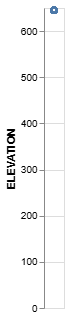

In [6]:
alt.Chart(df).mark_point().encode(
    y='ELEVATION'
)

#### Отображение высот по отношению к названиям станций.

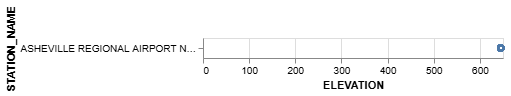

In [7]:
alt.Chart(df).mark_point().encode(
    y='STATION_NAME',
    x='ELEVATION'
)

#### Показ температурных и влажностных данных для климатических станций.

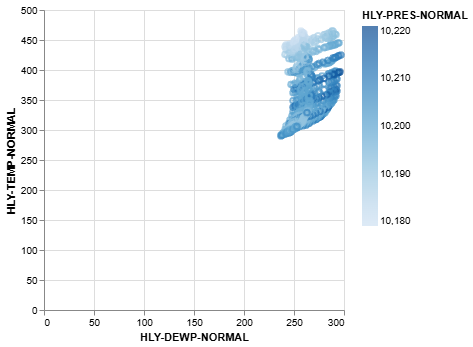

In [8]:
alt.Chart(df).mark_point().encode(
    color='HLY-PRES-NORMAL',
    y='HLY-TEMP-NORMAL',
    x='HLY-DEWP-NORMAL'
)

### Загрузка данных о стихийных бедствиях с информацией о смертности и времени событий и работа с ними.

In [9]:
df = data.disasters()
df.head()

,Entity,Year,Deaths
0,All natural disasters,1900,1267360
1,All natural disasters,1901,200018
2,All natural disasters,1902,46037
3,All natural disasters,1903,6506
4,All natural disasters,1905,22758


#### Демонстрация смертности по годам и странам

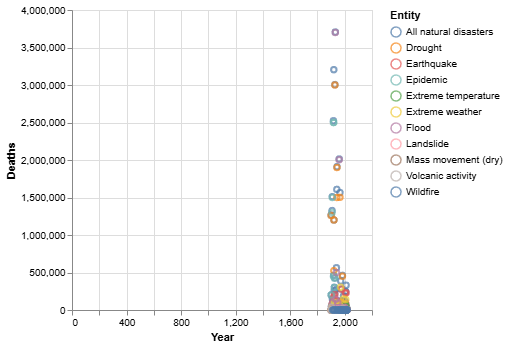

In [10]:
alt.Chart(df).mark_point().encode(
    color='Entity',
    y='Deaths',
    x='Year'
)

#### Тик-график смертности по годам и странам

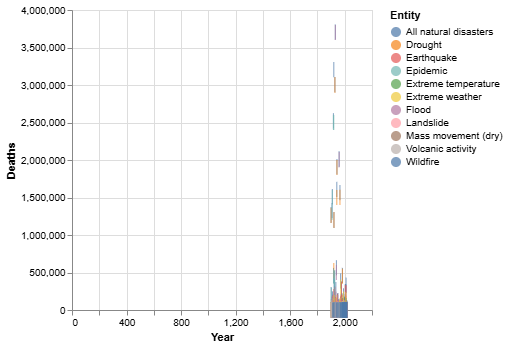

In [11]:
alt.Chart(df).mark_tick().encode(
    color='Entity',
    y='Deaths',
    x='Year'
)

#### Точечный график смертности с категоризацией по годам

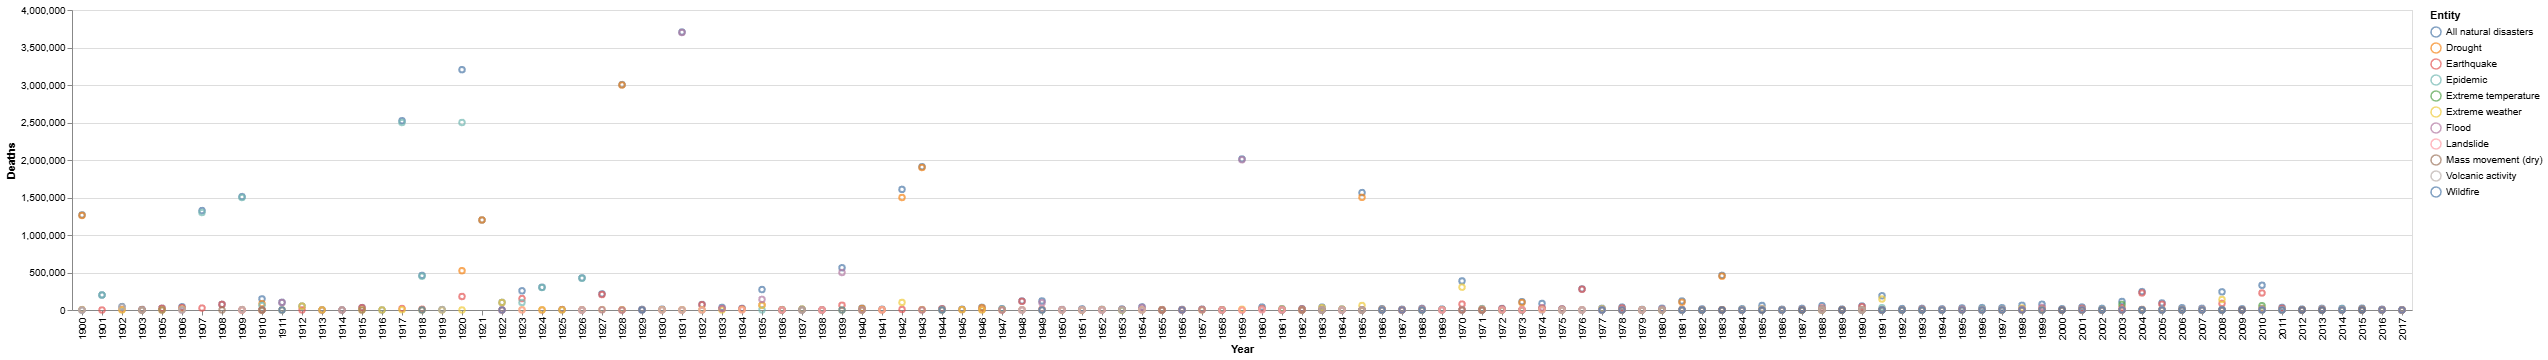

In [12]:
alt.Chart(df).mark_point().encode(
    color='Entity:N',
    y='Deaths:Q',
    x='Year:O'
)

#### Точечный график смертности по временной шкале

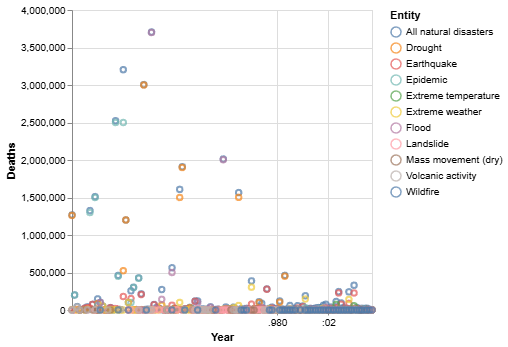

In [13]:
alt.Chart(df).mark_point().encode(
    color='Entity:N',
    y='Deaths:Q',
    x='Year:T'
)

#### Средняя смертность по странам

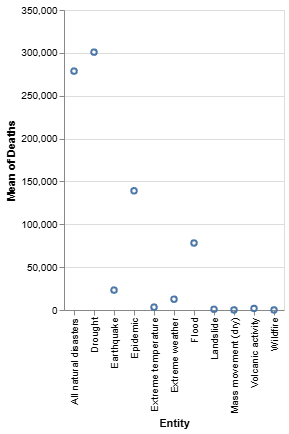

In [14]:
alt.Chart(df).mark_point().encode(
    y='mean(Deaths):Q',
    x='Entity:N'
)

#### Отображение средней смертности по странам

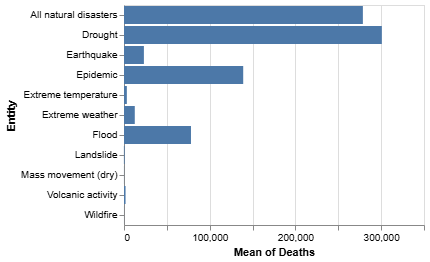

In [15]:
alt.Chart(df).mark_bar().encode(
    x='mean(Deaths):Q',
    y='Entity:N'
)

#### Столбчатая диаграмма средней смертности по странам и годам

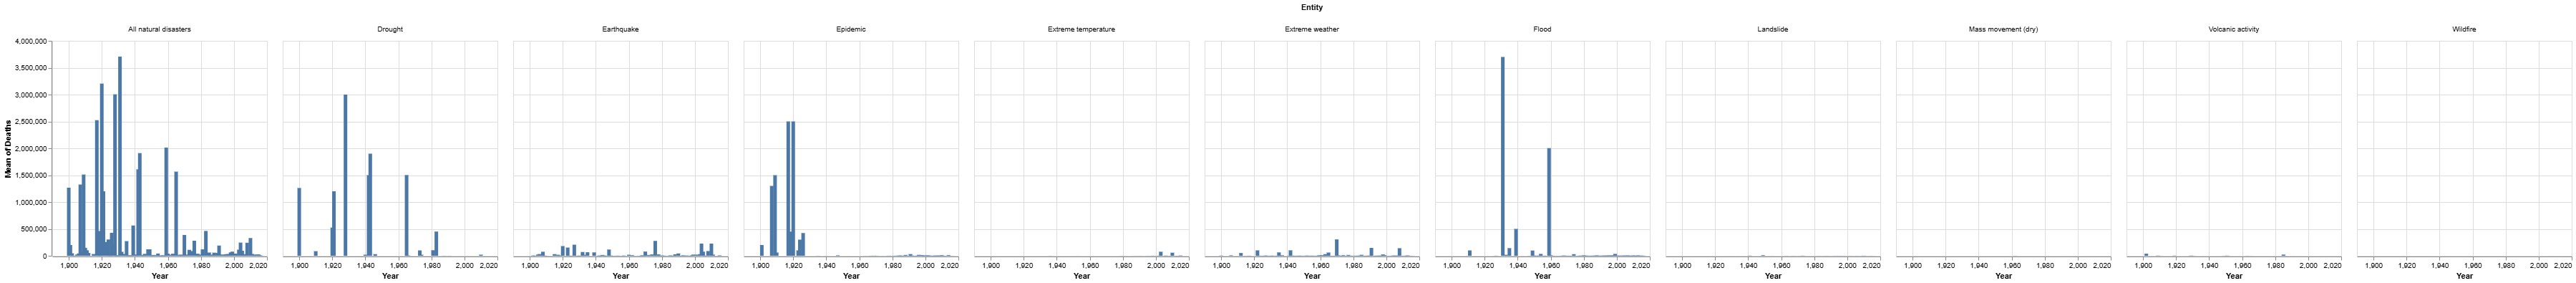

In [16]:
alt.Chart(df).mark_bar().encode(
    y='mean(Deaths):Q',
    column='Entity:N',
    x='Year'
)

#### Линейный график минимальной смертности по годам

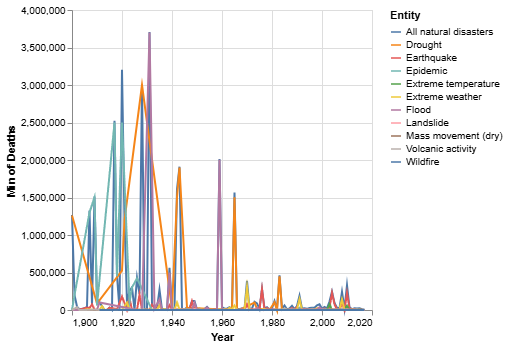

In [17]:
alt.Chart(df).mark_line().encode(
    color='Entity',
    y='min(Deaths)',
    x='Year'
)

#### Показ средней смертности по годам и странам

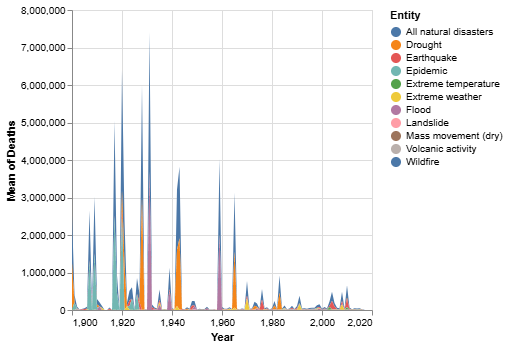

In [18]:
alt.Chart(df).mark_area().encode(
    color='Entity',
    y='mean(Deaths)',
    x='Year'
)

#### Тепловая карта количества записей по максимальной смертности и странам.

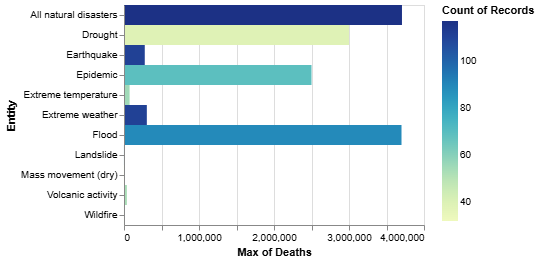

In [19]:
alt.Chart(df).mark_rect().encode(
    x='max(Deaths)',
    y='Entity',
    color='count()'
)

#### Точечный график с размером и цветом, зависящими от количества смертей

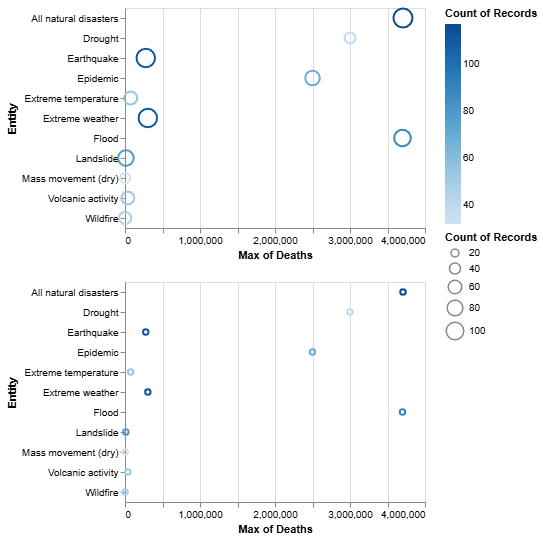

In [20]:
sizevar = alt.Chart(df).mark_point().encode(
    x='max(Deaths)',
    y='Entity',
    size='count()',
    color='count()'
)

colorvar = alt.Chart(df).mark_point().encode(
    x='max(Deaths)',
    y='Entity',
    color='count()',
    tooltip='count()'
)

sizevar&colorvar

#### Столбчатая диаграмма распределения смертности по годам

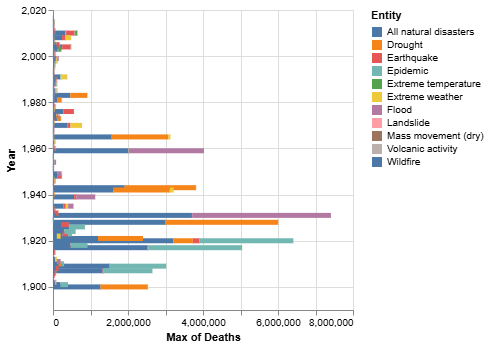

In [21]:
alt.Chart(df).mark_bar().encode(
    alt.X('max(Deaths)'),
    alt.Y('Year'),
    alt.Color('Entity')
)

#### Комбинация кругов и линий для анализа временных рядов.

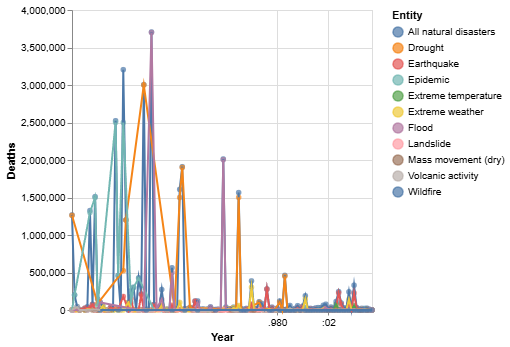

In [22]:
dots = alt.Chart(df).mark_circle().encode(
    x='Year:T',
    y='Deaths:Q',
    color='Entity:N'
)

lines = alt.Chart(df).mark_line().encode(
    x='Year:T',
    y='Deaths:Q',
    color='Entity:N'
)

dots+lines

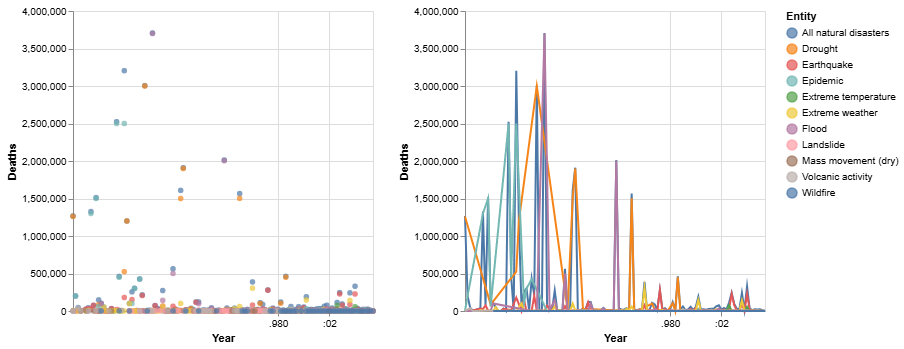

In [23]:
dots | lines